In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# Read the CSV files into DataFrames
hawaii_measurements_df = pd.read_csv('/Users/mauriciogil/Desktop/sqlalchemy-challenge/Resources/hawaii_measurements.csv')
hawaii_stations_df = pd.read_csv('/Users/mauriciogil/Desktop/sqlalchemy-challenge/Resources/hawaii_stations.csv')

In [21]:
from sqlalchemy import create_engine, MetaData, Table, Column, String, Float, Date

# Define SQLite database path (using absolute path)
db_path = '/Users/mauriciogil/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite'

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Define metadata
metadata = MetaData()


# Create all tables in the database
metadata.create_all(engine)


# Write the DataFrames to the SQLite database
hawaii_measurements_df.to_sql('hawaii_measurements', engine, if_exists='replace', index=False)
hawaii_stations_df.to_sql('hawaii_stations', engine, if_exists='replace', index=False)


9

In [22]:
# Reflect an existing database into a new model
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine

# Create an engine to connect to the SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")


In [16]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)

In [23]:
from sqlalchemy import create_engine, MetaData, Table, Column, String, Float, Date

# Define SQLite database path
db_path = '/Users/mauriciogil/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite'

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Define metadata
metadata = MetaData()

# Define your tables
measurement_table = Table(
    'measurement', metadata,
    Column('station', String, primary_key=True),
    Column('date', Date, primary_key=True),
    Column('prcp', Float),
    Column('tobs', Float)
)

station_table = Table(
    'station', metadata,
    Column('station', String, primary_key=True),
    Column('name', String),
    Column('latitude', Float),
    Column('longitude', Float),
    Column('elevation', Float)
)

# Create all tables in the database
metadata.create_all(engine)


In [14]:
# Create our session (link) from Python to the DB
# Code to Import modules
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

# Determine the absolute path to the SQLite database
import os
db_path = os.path.abspath('hawaii.sqlite')

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Create a session
session = Session(bind=engine)

In [6]:
# Import necessary modules
from sqlalchemy import create_engine, inspect

# Determine the absolute path to the SQLite database
import os
db_path = os.path.abspath('hawaii.sqlite')

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Inspect the tables in the database
inspector = inspect(engine)
table_names = inspector.get_table_names()
print("Tables in the database:", table_names)

# Inspect the columns in each table
for table_name in table_names:
    columns = inspector.get_columns(table_name)
    print(f"\nColumns in table '{table_name}':")
    for column in columns:
        print(f"  - {column['name']} ({column['type']})")


Tables in the database: ['measurement', 'station']

Columns in table 'measurement':
  - station (TEXT)
  - date (TEXT)
  - prcp (FLOAT)
  - tobs (BIGINT)

Columns in table 'station':
  - station (TEXT)
  - name (TEXT)
  - latitude (FLOAT)
  - longitude (FLOAT)
  - elevation (FLOAT)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# Query for the most recent date in the dataset
# Import necessary modules

from sqlalchemy import create_engine, MetaData, Table, Column, String, Float, Date, Integer
from sqlalchemy.orm import Session, declarative_base
from sqlalchemy import func

import os

# Determine the absolute path to the SQLite database
db_path = os.path.abspath('hawaii.sqlite')

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Create a base class
Base = declarative_base()

# Reflect the tables
metadata = MetaData()
measurement_table = Table('measurement', metadata, autoload_with=engine)
station_table = Table('station', metadata, autoload_with=engine)

# Define the Measurement and Station classes
class Measurement(Base):
    __tablename__ = 'measurement'

    id = Column(Integer, primary_key=True, autoincrement=True)
    station = Column(String)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Integer)

class Station(Base):
    __tablename__ = 'station'

    id = Column(Integer, primary_key=True, autoincrement=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

# Create a session
session = Session(bind=engine)

# Query for the most recent date in the dataset
latest_date = session.query(func.max(Measurement.date)).scalar()

print("The most recent date in the dataset:", latest_date)


The most recent date in the dataset: 2017-08-23


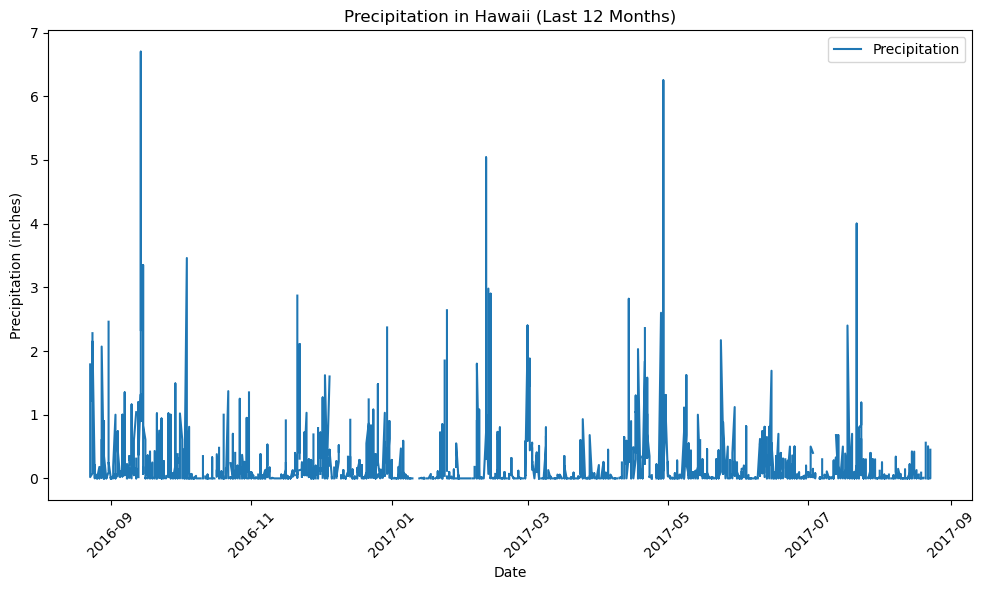

In [21]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Design a query to retrieve the last 12 months of precipitation data
# Starting from the most recent data point in the database
latest_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = latest_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation')
plt.title('Precipitation in Hawaii (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
print("Summary Statistics for Precipitation Data:")
print(summary_stats)


Summary Statistics for Precipitation Data:
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).scalar()

print(f'Total number of stations in the dataset: {num_stations}')


Total number of stations in the dataset: 9


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import func

# This code will design a query to find the most active stations
station_activity = session.query(Measurement.station, func.count(Measurement.station)) \
                          .group_by(Measurement.station) \
                          .order_by(func.count(Measurement.station).desc()) \
                          .all()

# This code is to print the stations and their activity counts in descending order
print("Most active stations:")
for station, count in station_activity:
    print(f"Station ID: {station}, Activity Count: {count}")


Most active stations:
Station ID: USC00519281, Activity Count: 2772
Station ID: USC00519397, Activity Count: 2724
Station ID: USC00513117, Activity Count: 2709
Station ID: USC00519523, Activity Count: 2669
Station ID: USC00516128, Activity Count: 2612
Station ID: USC00514830, Activity Count: 2202
Station ID: USC00511918, Activity Count: 1979
Station ID: USC00517948, Activity Count: 1372
Station ID: USC00518838, Activity Count: 511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Retrieve the most active station ID from the previous query
most_active_station_id = station_activity[0][0]  # Assuming station_activity is from the previous query

# Design a query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                           .filter(Measurement.station == most_active_station_id) \
                           .all()

# Extract the results
if temperature_stats:
    min_temp, max_temp, avg_temp = temperature_stats[0]
    print(f"For station ID {most_active_station_id}:")
    print(f"Lowest Temperature: {min_temp} F")
    print(f"Highest Temperature: {max_temp} F")
    print(f"Average Temperature: {avg_temp:.2f} F")
else:
    print(f"No temperature data found for station ID {most_active_station_id}")


For station ID USC00519281:
Lowest Temperature: 54 F
Highest Temperature: 85 F
Average Temperature: 71.66 F


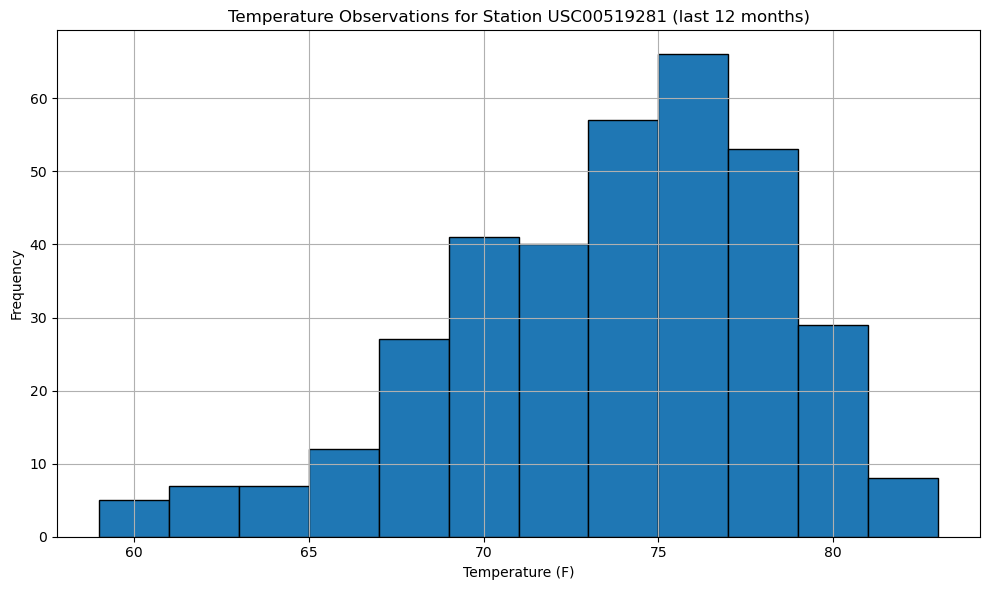

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import matplotlib.pyplot as plt
from sqlalchemy import func

# Assuming you have already identified `most_active_station_id` from the previous query

# Design a query to retrieve the last 12 months of temperature data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs) \
                         .filter(Measurement.station == most_active_station_id) \
                         .filter(Measurement.date >= one_year_ago) \
                         .all()

# Load the query results into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'temperature'])

# Convert the date column to datetime format
temperature_df['date'] = pd.to_datetime(temperature_df['date'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id} (last 12 months)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [29]:
# Close Session
session.close()